# Data Wrangling

- `pandas`
- Where to find data?
   - Web Scraping & APIs
   
   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS108/Lectures-Wi26/blob/main/05-Pandas.ipynb)





<center>
<img src="https://raw.githubusercontent.com/COGS108/Lectures-Wi22/main/02_python/img/pandas.png" alt="pandas" width="600px">
</center>



Pandas is Python library for managing heterogenous data. Center base to import data, tables, graphics, etc. 

At its core, Pandas is used for the **DataFrame** object, which is:
- a data structure for labeled rows and columns of data
- associated methods and utilities for working with data.
- each column contains a `pandas` **Series**

# After this

When you are done with this exercise/lecture... the real learning can begin!

One of your best tools is https://pandastutor.com

Another is the documentation for pandas including https://pandas.pydata.org/docs/user_guide/10min.html

## Setup

In [1]:
# Import standard libraries
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# reminder about tab completion and contextual help

pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

## Loading Data

In [3]:
# Load a csv file of data
df = pd.read_csv('data/my_data.csv')
print('total elements:',df.size,'\nshape of table',df.shape)

total elements: 1200 
shape of table (200, 6)


In [8]:
# Check out a few rows or last few rows of the dataframe using head() or tail()
df.tail(6) # gives you the last 5 rows or you can choose how many in the parenthesis 
#df.head -- gives you the first 5 rows 


,id,first_name,last_name,age,score,value
194,96371,Sherri,Austin,46,698,29412.01
195,97441,Krista,Ortiz,34,-1,24074.79
196,97728,Anna,Chambers,37,598,0.00
197,98115,Jennifer,Pitts,29,606,6876.75
198,98284,Brittany,Jenkins,34,665,43525.88
199,98366,Katelyn,Brown,45,501,29668.38


Pandas DataFrame:
- Index for each row
- Column name for each column (Series)
- Stores heterogenous types

## Slicing

In [9]:
# Slicing (Indexing): select a Series (column) using its name
df['age']

0      46
1      46
2      48
3      52
4      44
       ..
195    34
196    37
197    29
198    34
199    45
Name: age, Length: 200, dtype: int64

In [10]:
# Slicing: select a row & column BY NAME with 'loc'
df.loc[4, 'age']

44

In [12]:
# slicing: getting several rows/columns at a time, you can select the specific range of rows you want 
df.loc[3:8, ['age', 'last_name'] ]

,age,last_name
3,52,Bradley
4,44,Thomas
5,57,Williams
6,46,Wood
7,50,Garcia
8,68,Coleman


In [17]:
# slicing: getting several rows/columns at a time, choosing specific range of categories from the original table 
df.loc[[3, 7, 9], 'first_name':'age' ] #colins work to choose from beginning to end 

#loc function lets us chose by name 

,first_name,last_name,age
3,Derrick,Bradley,52
7,Amber,Garcia,50
9,Eric,Atkins,56


In [21]:
# slicing by the POSITION (not name!)
df.iloc[4:8,2:4]

#iloc means index position, by number not name 

,last_name,age
4,Thomas,44
5,Williams,57
6,Wood,46
7,Garcia,50


In [24]:
name_df = df.set_index('last_name') #changes the index to go by last names rather than in order numbers. This can help yp get data for a speciifc category

name_df

In [25]:
name_df

,id,first_name,age,score,value
last_name,,,,,
Clark,295,Andrea,46,-1,24547.87
Woods,620,Bill,46,492,46713.90
Jacobson,891,Alexander,48,489,32071.74
Bradley,914,Derrick,52,-1,30650.48
Thomas,1736,Allison,44,-1,9553.12
...,...,...,...,...,...
Ortiz,97441,Krista,34,-1,24074.79
Chambers,97728,Anna,37,598,0.00
Pitts,98115,Jennifer,29,606,6876.75


In [27]:
name_df.loc[['Clark','Thomas']] # looking for names/lastname 

,id,first_name,age,score,value
last_name,,,,,
Clark,295,Andrea,46,-1,24547.87
Clark,9386,Jackie,44,432,15446.53
Thomas,1736,Allison,44,-1,9553.12


#### Question #1A

What would be the output of `df['age'] > 10`?

- A) subset of `df` including only rows of individuals older than 10
- B) a Boolean with `True` for rows where age is greater than 10 and `False` otherwise - Correct 
- C) `id`s of rows where observations are greater than 10 
- D) an error
- E) I'm super lost

In [29]:
df['age']>10

0      True
1      True
2      True
3      True
4      True
       ... 
195    True
196    True
197    True
198    True
199    True
Name: age, Length: 200, dtype: bool

#### Question #1B

Given the answer to 1A, how can you use that to method to select all the rows with age>50?

How about with age>50 and also having a score==-1?

Use the cell below to work these out...

In [34]:
### YOUR CODE HERE

#### Other ways to select...

For simpler selection tasks you can also use:
- .query() 
- .set_index().loc[]
but slicing as we did above is the most general, flexible method suitable for very complicated situations

In [35]:
df.query('first_name == "Andrea" ')

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
27,15137,Andrea,Simpson,55,-1,12155.47


In [36]:
(
    df
    .set_index('first_name')
    .loc['Andrea']
)

,id,last_name,age,score,value
first_name,,,,,
Andrea,295,Clark,46,-1,24547.87
Andrea,15137,Simpson,55,-1,12155.47


NOTE: .loc uses the index, whatever it is, 
and sometimes the index is NOT numeric!

Compare this usage
```python
df.set_index('age').loc[52]
```

to the usage in the previous cell
```python
df.set_index('first_name').loc['Andrea']
```

In contrast .iloc is always positional... the i stands for index.
Therefore
```python
df.set_index('age').iloc[5:15]
```
and
```python
df.set_index('first_name').iloc[5:15]
```
produce the same output rows -- the 5th up to but not including the 15th -- but obviously with a different index in each case

## Checking out the DataFrame

In [37]:
# Check how large our dataframe is
df.shape

(200, 6)

In [38]:
# Check what columns we have in our DataFrame
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'score', 'value'], dtype='object')

In [39]:
df.set_index('first_name').index

Index(['Andrea', 'Bill', 'Alexander', 'Derrick', 'Allison', 'Stephen', 'Malik',
       'Amber', 'David', 'Eric',
       ...
       'Lisa', 'Julia', 'Wayne', 'Michael', 'Sherri', 'Krista', 'Anna',
       'Jennifer', 'Brittany', 'Katelyn'],
      dtype='object', name='first_name', length=200)

In [40]:
# Check the datatypes of our variables
df.dtypes

id              int64
first_name     object
last_name      object
age             int64
score           int64
value         float64
dtype: object

## Exploring the data

- quantitative (numbers)
- qualitative (categorical)
- basic descriptive statistics

In [42]:
# Checking categorical data
df['first_name'].value_counts() # value counts 

first_name
David       6
Michael     5
Eric        4
Charles     4
James       4
           ..
Alison      1
Andrew      1
Vanessa     1
Samantha    1
Katelyn     1
Name: count, Length: 134, dtype: int64

In [43]:
# Check a particular descriptive statistic, like mean(), median(), mode(), std(), var(), etc
df[['id','age', 'value']].median() 

id       54643.50
age         46.00
value    17976.51
dtype: float64

In [44]:
# Describe a particular column
df['value'].describe()

count       189.000000
mean      28730.336296
std       32493.945741
min           0.000000
25%        9593.030000
50%       17976.510000
75%       33163.310000
max      204999.960000
Name: value, dtype: float64

In [45]:
# Get descriptive statistics of all numerical columns
df.describe()

,id,age,score,value
count,200.000000,200.000000,200.000000,189.000000
mean,52929.150000,46.020000,416.595000,28730.336296
std,29414.298899,10.028582,237.176674,32493.945741
min,295.000000,14.000000,-1.000000,0.000000
25%,26709.500000,39.000000,288.750000,9593.030000
50%,54643.500000,46.000000,463.500000,17976.510000
75%,80840.750000,53.000000,596.500000,33163.310000
max,98366.000000,69.000000,942.000000,204999.960000


#### Question #2A

What's the average (mean) age of the individuals in this dataset?

- A) 14
- B) 46 -correct 
- C) 28730
- D) NA
- E) I'm super lost/unsure

#### Question #2B

Use the code cell below to find the average age of adults (excluding minors age<18) in this dataset.

In [46]:
### YOUR CODE HERE

## `pandas`: Common Manipulations

You'll want to be *very* familiar with a few common data manipulations when wrangling data, each of which is described below:

Manipulation | Description
-------|------------
**select** | select which columns to include in dataset
**filter** | filter dataset to only include specified rows
**mutate** | add a new column based on values in other columns
**groupby** | group values to apply a function within the specified groups
**summarize** | calculate specified summary metric of a specified variable
**arrange** | sort rows ascending or descending order of a specified column
**merge** | join separate datasets into a single dataset based on a common column



## Selecting & Dropping Columns

- include subset of columns of larger data frame

In [47]:
df.head()

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12


In [48]:
# specify which columns to include
select_df = df[['id', 'age', 'score', 'value']]
select_df.head()

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12


In [49]:
# Drop rows we don't want
new_df = df.drop(labels=[0,2,6], axis='rows')

In [50]:
# Check out the DataFrame after dropping, what went wrong and how do we fix it?
new_df.head()

,id,first_name,last_name,age,score,value
1,620,Bill,Woods,46,492,46713.90
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12
5,2049,Stephen,Williams,57,333,138936.92
7,2607,Amber,Garcia,50,536,9367.27


## Filtering Data (slicing)

- include a subset (slice) of rows from larger data frame

In [51]:
# Check if we have any data from people below the age of 18
sum(df['age'] < 18)

1

In [52]:
df.loc[(df['age'] < 18)]

,id,first_name,last_name,age,score,value
160,84812,Amanda,Williams,14,749,5241.51


In [53]:
# Select only participants who are 18 or older  AND who have a score of -1
df_new = df[ (df['age'] >= 18)] # & (df['score']==-1)]
df_new

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12
...,...,...,...,...,...,...
195,97441,Krista,Ortiz,34,-1,24074.79
196,97728,Anna,Chambers,37,598,0.00
197,98115,Jennifer,Pitts,29,606,6876.75
198,98284,Brittany,Jenkins,34,665,43525.88


## Missing Data (NaNs)

In [54]:
# Check for missing values
df['value'].hasn

AttributeError: 'Series' object has no attribute 'hasn'

In [55]:
df.isnull?

Signature: df.isnull() -> 'DataFrame'
Docstring:
DataFrame.isnull is an alias for DataFrame.isna.

Detect missing values.

Return a boolean same-sized object indicating if the values are NA.
NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
values.
Everything else gets mapped to False values. Characters such as empty
strings ``''`` or :attr:`numpy.inf` are not considered NA values
(unless you set ``pandas.options.mode.use_inf_as_na = True``).

Returns
-------
DataFrame
    Mask of bool values for each element in DataFrame that
    indicates whether an element is an NA value.

See Also
--------
DataFrame.isnull : Alias of isna.
DataFrame.notna : Boolean inverse of isna.
DataFrame.dropna : Omit axes labels with missing values.
isna : Top-level isna.

Examples
--------
Show which entries in a DataFrame are NA.

>>> df = pd.DataFrame(dict(age=[5, 6, np.nan],
...                        born=[pd.NaT, pd.Timestamp('1939-05-27'),
...                              pd.Timestamp('1

In [56]:
# note in class
# can operate on entire dataframe
df.isnull()

,id,first_name,last_name,age,score,value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [57]:
# Check for null values by row
df.isnull().sum(axis='rows')

id             0
first_name     0
last_name      0
age            0
score          0
value         11
dtype: int64

In [58]:
# Have a look at the missing values
df[df['value'].isna()]
# can also use isnull()!

,id,first_name,last_name,age,score,value
17,10753,Laurie,Wood,58,335,NaN
30,16263,Victor,Dawson,42,323,NaN
44,24952,James,Wright,51,399,NaN
48,26091,Marie,Wyatt,44,620,NaN
53,29566,James,Kennedy,69,224,NaN
63,35466,Samantha,Park,55,483,NaN
76,42138,John,Stuart,28,543,NaN
90,51723,Megan,Nguyen,40,443,NaN
103,55821,Sarah,Kennedy,41,709,NaN
114,61534,Alexandra,Chavez,39,598,NaN


## Dealing with Missing Data - NaNs

In [59]:
# Dealing with null values: Drop rows with missing data
print('before dropping null rows',df.shape)
no_na_df = df.dropna()
print('new shape', no_na_df.shape)

before dropping null rows (200, 6)
new shape (189, 6)


In [60]:
# or you can fill in a value for those missing values!
df.fillna?
# df.fillna(100) or df.fillna( df['value'].mean() ) or just df.fillna()

Signature:
df.fillna(
    value: 'Hashable | Mapping | Series | DataFrame | None' = None,
    *,
    method: 'FillnaOptions | None' = None,
    axis: 'Axis | None' = None,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    downcast: 'dict | None | lib.NoDefault' = <no_default>,
) -> 'Self | None'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series:

    * ffill: propagate last valid observation forward to next valid.
    * backfill / bfill: use next valid observation to fill gap.

    .. deprecated:: 2.1.0
  

## Finding Missing Data - Bad Values

In [61]:
# Check for the properties of specific columns
df['score'].describe()

count    200.000000
mean     416.595000
std      237.176674
min       -1.000000
25%      288.750000
50%      463.500000
75%      596.500000
max      942.000000
Name: score, dtype: float64

In [62]:
df[df.score<0].shape

(33, 6)

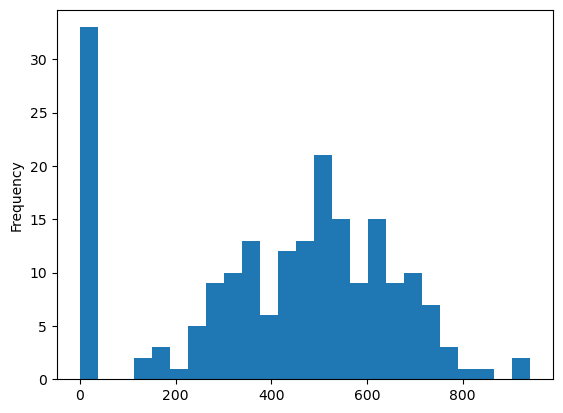

In [63]:
# Check the plot of the data for score to see the distribution
df['score'].plot(kind='hist', bins=25);

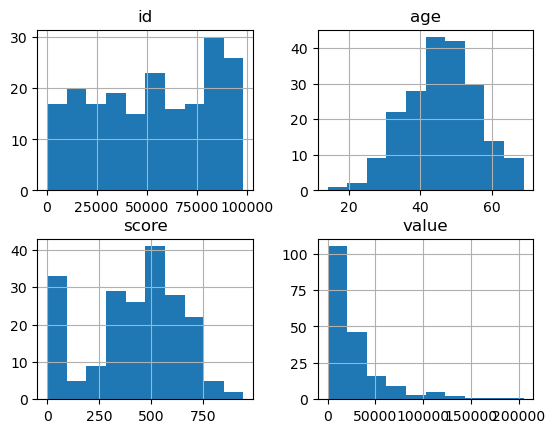

In [64]:
df.hist();

## Dealing with Missing Data - Bad Values

In [65]:
# Look for how many values have a -1 value in 'score'
sum(df['score'] == -1)

33

In [66]:
# Drop any row with -1 value in 'score'
df = df[df['score'] != -1]
df.shape

(167, 6)

## Creating new columns (mutating)

- `assign` can be very helpful in adding a new column
- lambda functions can be used to carry out calculations

In [67]:
# convert age in years to age in (approximate) days
df = df.assign(age_days = df['age'] * 365)
df.head()

,id,first_name,last_name,age,score,value,age_days
1,620,Bill,Woods,46,492,46713.90,16790
2,891,Alexander,Jacobson,48,489,32071.74,17520
5,2049,Stephen,Williams,57,333,138936.92,20805
7,2607,Amber,Garcia,50,536,9367.27,18250
8,2635,David,Coleman,68,351,66035.28,24820


In [68]:
df['age_months'] = df['age'] * 12
df.head()

,id,first_name,last_name,age,score,value,age_days,age_months
1,620,Bill,Woods,46,492,46713.90,16790,552
2,891,Alexander,Jacobson,48,489,32071.74,17520,576
5,2049,Stephen,Williams,57,333,138936.92,20805,684
7,2607,Amber,Garcia,50,536,9367.27,18250,600
8,2635,David,Coleman,68,351,66035.28,24820,816


## Grouping & summarizing

- group by a particular variable
- calculate summary statistics/metrics within group

In [70]:
df.first_name.value_counts() 

first_name
David        6
Charles      4
Eric         4
James        4
Elizabeth    3
            ..
Lisa         1
Alison       1
Sabrina      1
Andrew       1
Katelyn      1
Name: count, Length: 121, dtype: int64

In [72]:
# caclculate average within each age #take names in specific and take their mean age of the people with teh same name 
df.groupby('first_name').age.mean()

first_name
Aaron        32.0
Alexander    54.0
Alexandra    37.5
Alice        47.0
Alison       40.0
             ... 
Valerie      48.0
Vanessa      35.0
Victor       42.0
Wayne        28.0
William      49.5
Name: age, Length: 121, dtype: float64

## Sorting Rows (arrange)

- specify order in which to display rows

In [73]:
df.head()

,id,first_name,last_name,age,score,value,age_days,age_months
1,620,Bill,Woods,46,492,46713.90,16790,552
2,891,Alexander,Jacobson,48,489,32071.74,17520,576
5,2049,Stephen,Williams,57,333,138936.92,20805,684
7,2607,Amber,Garcia,50,536,9367.27,18250,600
8,2635,David,Coleman,68,351,66035.28,24820,816


In [74]:
# sort by values in age
df = df.sort_values(by = ['age'],ascending=True)
df.head()

,id,first_name,last_name,age,score,value,age_days,age_months
160,84812,Amanda,Williams,14,749,5241.51,5110,168
151,81282,Emily,Medina,23,775,9116.03,8395,276
132,70735,Eric,Olson,27,665,3975.59,9855,324
29,15887,Cassandra,Mann,27,684,17864.92,9855,324
155,83528,Brenda,Green,28,794,5233.10,10220,336


#### Question #3

How would you find the average score of people who are over 30 vs people who are 30 and younger?

In [ ]:
#### YOUR CODE HERE

## Combining datasets
![image of join operations](https://raw.githubusercontent.com/COGS108/Lectures-Fa24/main/img/join.png)

In [75]:
## Create two DataFrames
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})    
right = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': np.random.randn(4)})

In [76]:
left

,key,value
0,A,-1.260352
1,B,0.552427
2,C,0.126041
3,D,0.326000


In [77]:
right

,key,value
0,B,1.161965
1,D,-0.229500
2,E,0.919846
3,F,-1.842112


In [79]:
# inner merge # only B and D come because they are both in both dataframes 
pd.merge(left, right, on='key', how='inner')

,key,value_x,value_y
0,B,0.552427,1.161965
1,D,0.326000,-0.229500


In [80]:
# right merge
pd.merge(left, right, on='key', how='right')

,key,value_x,value_y
0,B,0.552427,1.161965
1,D,0.326000,-0.229500
2,E,NaN,0.919846
3,F,NaN,-1.842112


In [81]:
# left merge
pd.merge(left, right, on='key', how='left')

,key,value_x,value_y
0,A,-1.260352,NaN
1,B,0.552427,1.161965
2,C,0.126041,NaN
3,D,0.326000,-0.229500


In [82]:
# outer join
pd.merge(left, right, on='key', how='outer')

,key,value_x,value_y
0,A,-1.260352,NaN
1,B,0.552427,1.161965
2,C,0.126041,NaN
3,D,0.326000,-0.229500
4,E,NaN,0.919846
5,F,NaN,-1.842112


In [ ]:
# USE this cell to figure out if .merge() has a default "how" argument... i.e. what happens if you leave out how='...'

### YOUR CODE HERE


## Here's our check-in for today: https://forms.gle/EpNS7BYhfAxvBM4X7

No, I didn't put a QR code here because I expect you to be actively engaged in this notebook, not staring at my screen passively.  Get the notebook running and click the link above.



#### Question #4

How could you take the results of the outer merge and fill in the NaNs with the last good entry above the missing number in the each column?  Hint: look at the pandas docs for .fill()



In [ ]:
# USE this cell to figure out this question

### YOUR CODE HERE

## Visualizing Data

- We'll have a whole lecture (or two) on visualization
- For now, we'll just look at one uniquely-pandas approach

In [ ]:
# Plot all numerical columns, and their interactions
pd.plotting.scatter_matrix(df[['age', 'score', 'value']], figsize=[12, 12], marker=12);  

# Getting data directly from the internet

There are several ways you can load data into Pandas dataframes directly from the internet.  You don't need to have the data stored locally at all.
1. Use pd.read_csv(URL) or similar command to grab publicly visible files with their own HTTP address.
2. Web scrape HTML files and their contents
3. Use Application Program Interface (API) libraries like `gspread` to read data directly from cloud services (in this case from Google Sheets)
4. Use REST APIs to construct HTTP requests that will return well-organized data directly without scraping

Below we will show examples of some of these use cases... you can read the docs and learn more about these methods on your own!

## Direct HTTP access to files

GitHub and Google Drive and Dropbox can all give you sharing links for a file that will let you load the file from the cloud.  For instance you can get a file directly from its GitHub http address by adding '?raw=True' to the end of the URL.  This works nicely if you don't want to bother with cloning a repo that contains a file before loading that file from your local filesystem.

In [ ]:
# enrollment data for UCSD courses in Sp25
pd.read_csv('https://github.com/jasongfleischer/UCSDHistEnrollData/blob/master/data/schedules/SP25.tsv?raw=True', sep='\t')
# NB: this is read_csv() but I'm using it to read a tsv file!
# the function takes a sep argument that let's you specify the column seperator... 
# in this case the file is tab seperated between columns not comma seperated

## Web scraping

`requests` is a python library that allows you to construct and send URL requests to websites.  It will also dump back to you the HTML or other data type returned by the website.  If you're web scraping or using a REST API (see next section!) you will probably use requests or some similar tool

BeatifulSoup is the standard library for webscraping in Python.  It works by giving you pattern matching tools to extract data from within HTML tags.

Its easier to show an example than explain... but note that you will find lots of examples and tutorials for these if you search around!

Let's start with installing some libraries that (at least on my computer) needed to be installed to do this right

In [ ]:
# if you get a lot of requirement already satisfied prints here that's great!
# if there's an installation happening you may (or may not) need to restart your kernel to get these to work
%pip install lxml html5lib

In [ ]:
import requests # allows you to send URL requests and recieve the data back
from bs4 import BeautifulSoup # the most used web scraper in python land

# Request Jason's Github repositories page 
page = requests.get('https://github.com/jasongfleischer?tab=repositories')  

# The content we get back is a messily organized html file
print(page.text[:1000])  #  this goes on for a dozen pages, show only the first thousand characters of the web page

Now using a webscraper is an exercise in frustration and detailed reading of this ugly ugly HTML mess. Modern webpages have hundreds or thousands of tags... and to scrape you need to identify which tag types are holding the data you want off the page.  This is a manual, detailed, and often frustrating process.

Below you can see an example of how this can work.  First start by making a BeautifulSoup instance and feeding it the text coming out from our URL request

In [ ]:
soup = BeautifulSoup(page.text, 'html.parser')

# Identify repository elements.
# Inspect the HTML structure of a GitHub repositories page in your browser's developer tools. 
# Look for a common element or class that encloses each repository entry. 
# Typically, each element you want (in this case a repo in the list) 
# Will live within a <div>, <span>, <li>, <h2>, or other tag.  
# You would then use soup.find_all() to select all these elements.
# in our case there's a weirdly styled <li> (list item) that marks out repos today

repositories = soup.find_all('li', class_='col-12 d-flex flex-justify-between width-full py-4 border-bottom color-border-muted public source')
# You may need to adjust the class based on current GitHub structure... html will change without warning from time to time!!

# Extract repository details.
# that <li> tag was just the outer casing.  Each repo has different elements we want.
# So we iterate through each identified repository element and extract the desired information, such as:
#   Name: Usually within an h3 or a tag.
#   Description: Often in a p tag.
#   Language: Typically found within a span or li tag with a specific class.
#   Stars: Look for elements containing star icons or star counts.

repo_data = []
for repo in repositories:
        name_tag = repo.find('a', itemprop='name codeRepository')
        name = name_tag.text.strip() if name_tag else "N/A"

        description_tag = repo.find('p', itemprop='description')
        description = description_tag.text.strip() if description_tag else "No description"

        language_tag = repo.find('span', itemprop='programmingLanguage')
        language = language_tag.text.strip() if language_tag else "N/A"

        # Example for stars (may vary)
        star_tag = repo.find('a', href=lambda href: href and 'stargazers' in href)
        stars = star_tag.text.strip() if star_tag else "0"

        repo_data.append({
            'name': name,
            'description': description,
            'language': language,
            'stars': stars
        })

# pretty print the resulting data we collected
pd.DataFrame(repo_data)

#### Question #5

What type/format of output comes out of a call to `requests.get(URL).text`

- A) CSV
- B) HTML
- C) JSON
- D) API
- E) I'm super lost

## Application Program Interface (APIs)

Client-Server APIs are basically a way for your software to talk to someone elses software. The client-server part means that there is a central resource (server) that is being used by many other pieces of software (clients).  

An API is well documented, telling you what kinds of data you can obtain (or submit!) and how to form your requests.  That means you should always RTFM (and you should look up that term if you don't know what it means).

APIs are often (but not always) via HTTP.  These web based APIs for client-server applications are known as  Representational State Transfer APIs aka REST APIs. These RESTful APIs utilize standard HTTP methods (verbs) to perform operations on resources:

- GET: Retrieves a resource or a collection of resources.
- POST: Creates a new resource.
- PUT: Updates an existing resource (replaces the entire resource).
- PATCH: Partially updates an existing resource.
- DELETE: Removes a resource.


The `requests` library we mentioned earlier implements RESTful interfaces.  For instance you can get data from an API
```python
r = requests.get('https://api.github.com/events')
```
or post data to a webpage
```python
r = requests.post('https://httpbin.org/post', data={'key': 'value'})
```


Notes on APIs:
- Make sure to read the API docs and understand the guidelines! 
- These guidelines typically specify the number / rate / size of requests.  If you break those guidelines you may be banned from the API.

#### Github API

One example of a REST API you can access is GitHub.  The software we use to setup the project repos for all 800 or so of you in this class uses this API.

https://api.github.com/

its documentation is here

https://docs.github.com/en/rest?apiVersion=2022-11-28

For example, the following URL will give you data about whatever username you place at the end of the request. 

https://api.github.com/users/some_user_name

In the cell below you can see an example of sucking in data from GitHub API and spitting it out in a Pandas dataframe



In [ ]:
from datetime import datetime, timedelta
from time import sleep

commit_list = []

# GitHub username
username = "jasongfleischer"

headers = {}
# optional: GitHub token for authentication allows you to access 
# private repos and also make more requests/minute than without a token
#
# if you want to see how to get a token for Github API you can
# simply search or ask an AI "how to make a token for github API access"
#
# to use a token uncomment the lines below and copy/paste your token 
# token = "your github token here"
# headers = {    "Authorization": f"token {token}"}

# Calculate date one year ago
one_year_ago = (datetime.utcnow() - timedelta(days=365)).isoformat() + "Z"

# Step 1: Get user's repositories
repos_url = f"https://api.github.com/users/{username}/repos"
repos_response = requests.get(repos_url, headers=headers)
repos = repos_response.json()

# Step 2: Get commits from the last year
for repo in repos:
    repo_name = repo['name']
    commits_url = f"https://api.github.com/repos/{username}/{repo_name}/commits"
    params = {
        "since": one_year_ago,
        "author": username  # Filter commits authored by the user
    }
    commits_response = requests.get(commits_url, headers=headers, params=params)
    commits = commits_response.json()
    sleep(0.5) # pause for half a second between requests to prevent exceeding the API rate
    
    for commit in commits:
        sha = commit['sha']
        message = commit['commit']['message']
        date = commit['commit']['author']['date']
        commit_list.append( {'repo': repo_name, 'hash':sha, 'timestamp':date, 'message':message} )


# Step 3: create a DataFrame of the users commits
commit_df = pd.DataFrame(commit_list)

commit_df

#### Question #6

Take a look at what's inside the variable `commits_response` that was created in the cell above.  What type/format of output is it?

- A) CSV
- B) HTML
- C) JSON
- D) API
- E) I'm super lost

#### Authorization for an API

APIs often require some way to show who is using the API. That allows the API to have some method of making sure that people only see data they should.  It also allows the API to track the data usage better.  

Even APIs that do not *require* authorization (like GitHub) work better/faster/longer when you use them with an authorization.  If you run the GitHub request cell above too much GitHub will stop serving you data because this is non-authorized.  But look at the code above... there's a commented out version of the variable `headers` where you could provide an authorization token... and if you do that your GitHub access will be restored even after you runout of non-authorized data.

Many APIs use the Open Authorization (OAuth) protocol.  This is a token based system.  You ask for a token from the server, and then use that token in future communication to show who is making the request and to verify that the requester is authorized to access the data.  A token is a bit like a password, but it isn't linked to a user per se, but usually to a piece of software. 

While OAuth tokens are NOT passwords, you should treat them as such.  Do **NOT** hard code the token into your code.  Essentially once you share your code with another person you are also giving them your password (a big no no!).  Instead tokens can be stored in secret files that live only on your computer (not in the repo!) or inside shell environment variables.

OAuth systems are used in both APIs which you might use via HTTP (like GitHub) and non-web based ones (like `gspread` for Google Sheets direct access).  And of course there are other methods to authenticate that may be used too :)

Here is a [tutorial on OAuth](https://www.digitalocean.com/community/tutorials/an-introduction-to-oauth-2)



## Web Scraping vs. APIs

Web scraping and APIs are different approaches:

- APIs are an interface to interact with an application, designed for programmatic use
    - They allow systematic, controlled access
    - They typically return structured (friendly) data 
    - If you access via API following any rate limit rules you will not be blocked  

- Web scraping (typically) involves having your bot navigate a site systematically, collecting and processing the webpage data
    - This can be hard to systematize, being dependent on the idiosyncracies of a web page, at the time you request it
    - This typically returns relatively unstructured data
    - Worse, the webpage tags can and will change over time. You'll have to redo your webscraping code from time to time
    - Much more wrangling of the data
    - If the site notices you're scraping you will be blocked

If you'd like to see more about API usage to get data, here is the documentation for GitHub's API as an example https://docs.github.com/en/rest?apiVersion=2022-11-28

Below is an example of using the GitHub API and storing outputs in a Pandas DataFrame


## Where to Find Data?

There are of course MANY more data sources... if you want to add your favorite you can make a pull request on this file :)

ALSO there are soooooo many data download sources and so many lists of data download sources.... do NOT get stuck just looking at Kaggle!  search for these!

* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets/blob/master/README.rst)
* [Data.gov](https://catalog.data.gov/dataset)
* [Data Is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0)
* [UCSD Datasets](https://ucsd.libguides.com/data-statistics/home)
* [Datasets | Deep Learning](http://deeplearning.net/datasets/)
* [Stanford | Social Science Data Collection](https://data.stanford.edu/)
* [Eviction Lab (email required)](https://evictionlab.org/get-the-data/)
* [San Diego Data](https://data.sandiego.gov/)
* [US Census](https://www.census.gov/)
* [Open Climate Data](http://openclimatedata.net/)
* [Data and Story Library](https://dasl.datadescription.com/datafiles/)
* [UCSD behavioral mobile data](http://extrasensory.ucsd.edu/)
* [Kaggle](https://www.kaggle.com/)
* [FiveThirtyEight](https://data.fivethirtyeight.com/)
* [data.world](https://data.world/)
* [Free Datasets - R and Data Mining ](http://www.rdatamining.com/resources/data)
* [Data Sources for Cool Data Science Projects](https://blog.thedataincubator.com/2014/10/data-sources-for-cool-data-science-projects-part-1/)

## Notes on Working with Data

### Data Science is Ad-Hoc

- It is part of the job description to put things together that were not designed to go together.
- We do not have universal solutions, but haphazard, idiosyncratic systems, for data collection, storage and analysis.
- Data is everywhere. But relatively little of it was collected *as data*.

### Data Collection, Curation, and Storage are Difficult

- It can be difficult to choose broadly useful standards
- Take time to think about your data, and how you will load, store, organize and save it

### Data is Inherently Noisy

- We live in a messy, noisy, world, with messy, noisy, people, using messy, noisy instruments.
- There is no perfect data. 
    - There is better / or worse data, given the context.

### Different Objectives

- Humans and computers are different.
- We interact with '*data*' in different ways.
- This underlies many aspects of data wrangling
    - The 'friendliness' of data types / files
    - The difference between web scraping and APIs
    - A disconnect between data in the real world, and data we want to use

## So... What to do?

- Think about how your data are stored & its structure?
- Look at your data before you anayze it
    - are there missing values? 
    - outlier values? 
- Are your data trustworthy? 
    - source?
    - how was it generated?

## Specific Recommendations

- Prioritize using well structured, common, open file types
    - Take advantage of existing tools to deal with these files (numpy, pandas, etc.)

- Look into, and then follow, common conventions
    - Minimize custom objects, workflows and data files 
- Look for APIs. Ask if they are available.
    - Acknowledge that web scraping and/or wrangling unstructured data are complex / long tasks

- Think about data flow from the beginning. Organize your data pipeline, consider the 'wrangling' aspects throughout
    - Set yourself up with well organized, labelled approach to your data
    - Think about when and how you might want/need to save out intermediate results.